## Topological Sorting
### Overview of Kahn's Algorithm
* Topological sorting provides a linear sorting based on the required ordering between vertices in directed acyclic graphs
  + to be specific, given vertices u and v, to reach v, we must have reached vertex u first
    + in topological sorting, u has to appear before v in the ordering
* the most popular algorithm for topological sorting is Kahn's algorithm
* BFS algorithm
  + build an adjacency list that stores the strict prerequisite courses for each course by traversing the edges. This step has O(E) for both time and space complexities. This step also store the in-degree for each course that takes O(V) space
    + time complexity is O(E), space complexity is O(E+V) for this step
  + in a deque, visit each course (vertex) with an in-degree of zero and decrement the in-degree of all courses that have this course as a prerequisite (outgoing edges). In the worst case, we will visit every vertex and decrement every outgoing edge once. Thus, this step will take O(V+E) time. The queue will take at most O(V) space
  + time complexity:
    O(V+E) + O(E) = O(V+E)
  + space complexity
    O(V) + O(E+V) = O(E+V)
    
* DFS algorithm
  + Option 1: For each node, if it has indegrees of value zero, then recursively call dfs in the first implementation
  + Option 2: USe color state tracking, we set a is_acyclic to track if there is a cycle
    + If there is a cycle, we will not continue the dfs, since we will return empty list
    + If the current vertex is white, we will change it to grey, and traverse its neighbors
      + if the neighbor is white, recursively call dfs on the neighbor
      + if the neighbor is grey, we detect a cycle, we set the is_acyclic to False and return
      + set the color of the current vertex to BLACK and add it to the result (this occurs only when all its neighbors are returned without a cycle detected
    + return the reverse order of the result 
    
* limitatios
  + only works with graphs that are directed and acyclic.
  + Must be at least one vertex in the “graph” with an “in-degree” of 0. If all vertices in the “graph” have a non-zero “in-degree”, then all vertices need at least one vertex as a predecessor. In this case, no vertex can serve as the starting vertex, as in a cycle.    

In [11]:
from typing import List
# implement using BFS (deque)
class Solution:
    def findOrder(self, numCourses: int, prerequisites: List[List[int]]) -> List[int]:
        if not prerequisites:
            return [i for i in range(numCourses)]
        
        indegrees = [0] * numCourses
        adj_list = [[] for _ in range(numCourses)]
        for course, pre in prerequisites:
            indegrees[course] += 1
            adj_list[pre].append(course)
            
        visited = []
        queue = deque()
        for i, val in enumerate(indegrees):
            if val == 0:
                visited.append(i)
                queue.append(i)
                
        while queue:
            pre = queue.popleft()
            
            for course in adj_list[pre]:
                indegrees[course] -= 1
                if indegrees[course] == 0:
                    queue.append(course)
                    visited.append(course)
        return visited if len(visited) == numCourses else []    
    
# DFS implementation

class Solution:
    def findOrder(self, numCourses: int, prerequisites: List[List[int]]) -> List[int]:
        if not prerequisites:
            return [i for i in range(numCourses)]
        
        indegrees = [0] * numCourses
        adj_list = [[] for _ in range(numCourses)]
        for course, pre in prerequisites:
            indegrees[course] += 1
            adj_list[pre].append(course)
            
        visited = []
        rs = []
        for i, val in enumerate(indegrees):
            if val == 0:
                visited.append(i)
               
                
        def dfs(idx: int) -> None:
            rs.append(idx)
            
            for course in adj_list[idx]:
                indegrees[course] -= 1
                if indegrees[course] == 0:
                    dfs(course)
                    
        for i in visited:
            dfs(i)
                
        
        return rs if len(rs) == numCourses else []        
            
# DFS implemented by state tracking
from enum import Enum
class State(Enum):
    WHITE = 0
    GREY = 1
    BLACK = 2
    
class Solution:
    def findOrder(self, numCourses: int, prerequisites: List[List[int]]) -> List[int]:
        if not prerequisites:
            return [i for i in range(numCourses)]
        
        adj_list = defaultdict(list)
        
        for course, pre in prerequisites:
            adj_list[pre].append(course)
            
        colors = [ State.WHITE for _ in range(numCourses) ]  
        
        is_acyclic = True
        rs = []
        
        def dfs(i: int) -> None:
            nonlocal is_acyclic
            
            if not is_acyclic:
                return                        
                        
            colors[i] = State.GREY
                
            if i in adj_list:
                for course in adj_list[i]:
                    if colors[course] == State.WHITE:
                        dfs(course)
                    elif colors[course] == State.GREY:
                        is_acyclic = False
                        return
                        
            colors[i] = State.BLACK
            rs.append(i)
                            
               
        for i in range(numCourses):
            if colors[i] == State.WHITE:
                dfs(i)
               
        return rs[::-1] if is_acyclic else []             
            

#### Leetcode 269 Alien Dictionary
  + There is a new alien language that uses the English alphabet. However, the order among the letters is unknown to you.
  + You are given a list of strings words from the alien language's dictionary, where the strings in words are sorted lexicographically by the rules of this new language.
  + Return a string of the unique letters in the new alien language sorted in lexicographically increasing order by the new language's rules. If there is no solution, return "". If there are multiple solutions, return any of them.
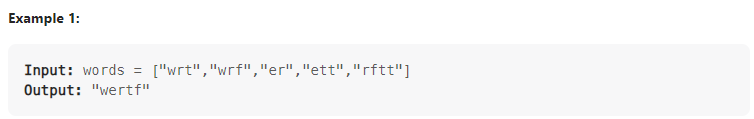
 
* DFS implementation
  + we didn't use the typical DFS with white, black and gray color to track the states of each node/vertex because getting all the unique characters from the input is not straightforward
  + we use a dictionary seen to record the states of each char
    + if char not in seen, it is white
    + if char has a true value in seen dictionary, it is black
    + if char or one of its previous vertices has a false value in seen dictionary, it is gray
  + rather than using an adj_list, we use reverse adjacent list to start the vertices and their previous vertices, so we don't need to reverse the output lsit 
  
* DFS implementation using color tracking
  + we can apply the white, black and gray template with DFS for topological sorting
  + first, we initialize all the unique chars of the input to color white
  + we then establish the adj_list with each char having previous chars as the key, and list containing their previous chars as the value
    + for the two neighboring words, the first chars that are different in these words are pre and curr, respectively. We insert the `adj_list[curr].append(pre)`
    + if we have two words where the second is a substring of the first one, we return empty string
  + for each key in the `adj_list`, we know they must have pres, so we get all these pres by calling dfs(char), which recursively calls its previous, and append the chars once it becomes BLACK. 
    + we also use the colors to detect cycles. Once a cycle is detected, we return False

In [7]:
# DFS using state tracking
# state tracked by seen dictionary, it has two states, True (corresponding to black)
# and False (corresponding to GRAY). If a char is not in seen, it is white

# once a gray occurs, return False, and total rs is empty string
# if a char is not seen, recursively call dfs, if all its pres are
# True (black), set itself as True, and return True
from typing import List
class Solution:
    def alienOrder(self, words: List[str]) -> str:
        if not words:
            return ""        
           
        rev_adj_list = { c:[] for word in words for c in word }
                
        for first, second in zip(words, words[1:]):
            for c, d in zip(first, second):
                if c != d:
                    rev_adj_list[d].append(c)
                    break
            else:
                if len(first) > len(second):
                    return ""      
               
        rs = []
        seen = {}    
                
        def dfs(c: str) -> bool:            
            if c in seen:
                return seen[c]                        
            
            # label the color of current vertex as GRAY
            seen[c] = False
                
            # traverse the previous vertices, and if any of them
            # are GRAY, return False, don't need to set seen[c] since
            # is already set as False
            for pre in rev_adj_list[c]:
                if not dfs(pre):
                    return False                    
            seen[c] = True
            rs.append(c)
            return True
            
        for c in rev_adj_list:
            if not dfs(c):
                return ""
                
        return "".join(rs)       
            

* BFS implementation
  + traverse the word list and
    + construct the adj_list using pre as the key and add curr to the value list
    + construct the in_degrees dictionary 
  + traverse the in_degrees dictionary, and add keys to rs and deque if value is zero
  + while q
    + popleft the vertex
    + traverse its adj_list, decrease the element's in_degrees, if in_degree is zero, add that element to the deque and rs
  + return rs if len(rs) == len(in_degree)
* if there are cycles, some elements will never be accessed, since their in degrees never equals zero 

In [ ]:
class Solution:
    def alienOrder(self, words: List[str]) -> str:
        if not words:
            return ""        
           
                
        adj_list = { c:[] for word in words for c in word }
        in_degrees = { c: 0 for word in words for c in word } 
                
        for first, second in zip(words, words[1:]):
            for c, d in zip(first, second):
                if c != d:
                    adj_list[c].append(d)
                    in_degrees[d] += 1
                    break
            else:
                if len(first) > len(second):
                    return ""      
               
        rs = []
        q = deque()
                        
        for c, v in in_degrees.items():
            if v == 0:
                rs.append(c)
                q.append(c)
                
        while q:
            curr = q.popleft()
            
            for neighbor in adj_list[curr]:
                in_degrees[neighbor] -= 1
                if in_degrees[neighbor] == 0:
                    q.append(neighbor)
                    rs.append(neighbor)
                   
        return "".join(rs) if len(rs) == len(in_degrees) else ""     
            
            

In [1]:
# extract unique chars from overlapping words in dictionary
words = ["wrt","wrf","er","ett","rftt"]
colors = { c: 0 for word in words for c in word }

#### Leetcode 310 Minimum Height Trees
* Overview
  + A tree is an undirected graph in which any two vertices are connected by exactly one path. In other words, any connected graph without simple cycles is a tree.
  + Given a tree of n nodes labelled from 0 to n - 1, and an array of n - 1 edges where edges[i] = [ai, bi] indicates that there is an undirected edge between the two nodes ai and bi in the tree, you can choose any node of the tree as the root. When you select a node x as the root, the result tree has height h. Among all possible rooted trees, those with minimum height (i.e. min(h))  are called minimum height trees (MHTs).
  + Return a list of all MHTs' root labels. You can return the answer in any order.
  + The height of a rooted tree is the number of edges on the longest downward path between the root and a leaf.
* the problem is find the root of MHT
* use the BFS topological sorting
  + establish adj_list using set to store the neighbors
  + record n_remaining (not the length of q!)
  + initialize q by adding all vertices having only one neighbor in its adj_list
  + while q, using layer by layer template
  + before laye by layer traverse, first check n_remaining < 3, if so, returns the list(q)
  + popleft curr vertex from q, we know it must have only one neighbor
  + decrement the n_remaining
  + pop ng from the adj_list of curr, and remove curr from ng's adj_list
  + if ng only has one neighbor in its adj_list, add it to the q
  
* time complexity
  + O(V+E)
  + O(E) for adj_list
  + O(V) to traverse adj_list to get all degree 1 vertices
  + O(V) in q in worst case to traverse all the vertices
* space complexity
  + O(V+E)
  + O(E) to store adj_list
  +O(V) to store all vertices in q in worst case  

In [5]:
from typing import List
class Solution:
    def findMinHeightTrees(self, n: int, edges: List[List[int]]) -> List[int]:
        if n < 3:
            return [ i for i in range(n)]
        
        adj_list = [set() for _ in range(n)]
        
        for start, end in edges:
            adj_list[start].add(end)
            adj_list[end].add(start)
            
        q = deque()
        n_remaining = n
        
        for i in range(n):
            if len(adj_list[i]) == 1:
                q.append(i)
       
        while q:
            if n_remaining < 3:
                return list(q)
            for _ in range(len(q)):
                curr = q.popleft()
                n_remaining -= 1
                
                # curr only has one neighboring vertex, pop it up and remove curr from its adj_list
                ng = adj_list[curr].pop()
                adj_list[ng].remove(curr)
                
                if len(adj_list[ng]) == 1:
                    q.append(ng)
                

#### Leetcode 1136 Parallel Courses
* Overview
  + You are given an integer n, which indicates that there are n courses labeled from 1 to n. You are also given an array relations where `relations[i] = [prevCoursei, nextCoursei]`, representing a prerequisite relationship between course prevCoursei and course nextCoursei: course prevCoursei has to be taken before course nextCoursei.
  + In one semester, you can take any number of courses as long as you have taken all the prerequisites in the previous semester for the courses you are taking.
  + Return the minimum number of semesters needed to take all courses. If there is no way to take all the courses, return -1.
* to find the minimum number of semesters to complete n courses with prerequisites defined in a relation list
* use BFS topological sorting, and layer by layer algorithm to find how many layes are needed to exhaust the courses
  + remember to check that all courses are accessed with no cycles
  + time complexity
    + O(V+E)
  + space complexity
    + O(V+E)
* use DFS 
  + rev_adj_list
  + use a dp array to record the state of the vertices
    + if state == -1, cycle, return -1
    + if state > 0, the max number of semester required to complet the current course/vertex
    + if state == 0, set it to -1 to detect cycle, if all its prerquisite courses completed without cycle, return the max of prerequsite course plus 1
  + traverse from 0 to n-1 and call dfs, if any dfs returns -1, return -1, otherwise, return max(dp)  

In [ ]:
# BFS implementation using layer by layer algorithm
class Solution:
    def minimumSemesters(self, n: int, relations: List[List[int]]) -> int:
        adj_list = [[] for _ in range(n)]
        in_degrees = [0] * n
        
        for pre, curr in relations:
            adj_list[pre-1].append(curr-1)
            in_degrees[curr-1] += 1
        
        q = deque()
        for i, val in enumerate(in_degrees):
            if val == 0:
                q.append(i)
                
        rs = 0
        while q:
            for _ in range(len(q)):
                pre = q.popleft()
                n -= 1
                
                for course in adj_list[pre]:
                    in_degrees[course] -= 1
                    if in_degrees[course] == 0:
                        q.append(course)
            rs += 1
        return rs if n ==0 else -1     
        

In [ ]:
# DFS with dp tracking (can not use BLACK, since each vertex has a positive number to show its state)
class Solution:
    def minimumSemesters(self, n: int, relations: List[List[int]]) -> int:
        rev_adj_list = [[] for _ in range(n)]
        dp = [0] * n        
        
        for pre, curr in relations:
            rev_adj_list[curr-1].append(pre-1)
            
        def dfs(i: int) -> int:
            if dp[i] != 0:
                return dp[i]
            
            dp[i] = -1
            rs = 1
            
            for pre in rev_adj_list[i]:
                pre_val = dfs(pre)
                if pre_val == -1:
                    return -1
                rs = max(rs, pre_val+1)
                
            dp[i] = rs
            return dp[i]
        
        for i in range(n):
            if dfs(i) == -1:
                return -1
            
        return max(dp)    